# Лабораторная работа 6

In [ ]:
import pandas as pd
import numpy as np

url = "hcvdata.csv"
data = pd.read_csv(url)

cats = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4,
}
data = data.drop(columns=['Unnamed: 0'])
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'm' else 0)
data['Category'] = data['Category'].apply(lambda x: cats[x])

data_filled = data.fillna(data.mean())
print(data_filled.isna().sum())


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


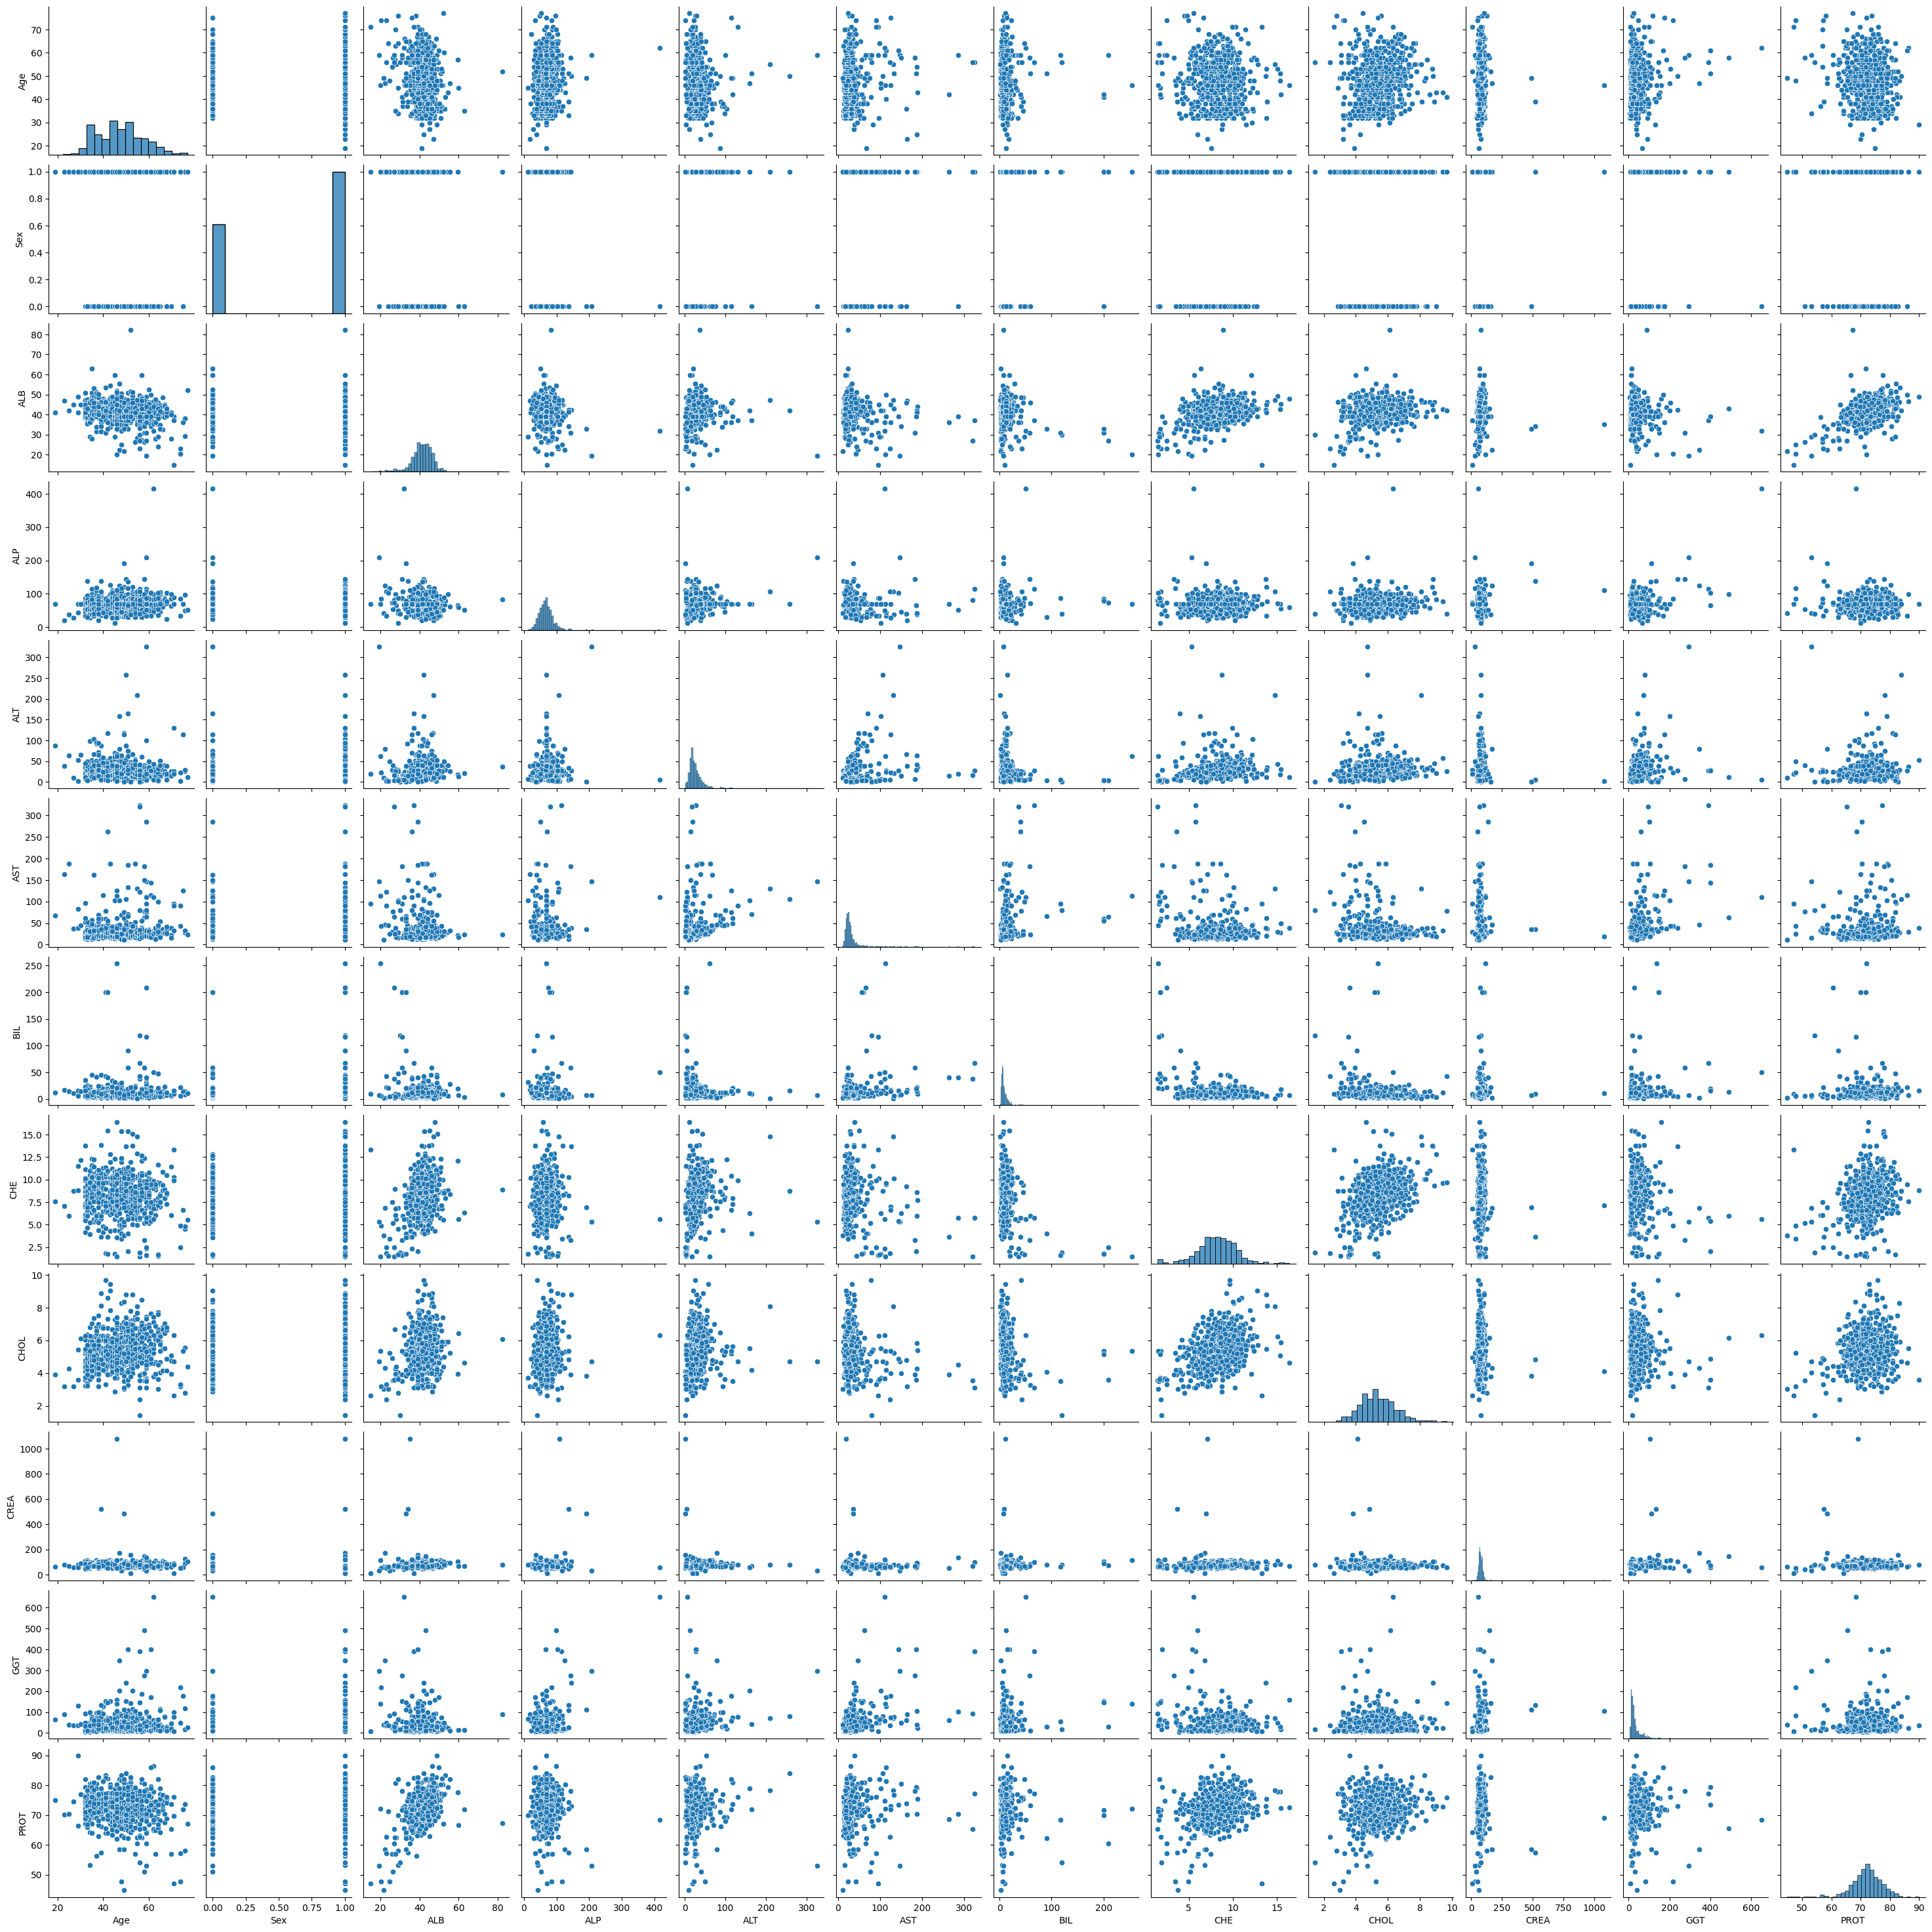

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_filled.drop(columns=['Category']))
plt.show()

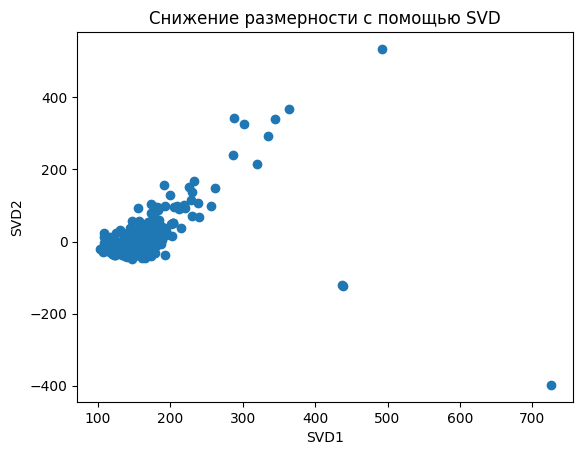

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(data_filled.drop(columns=['Category']))

svd_df = pd.DataFrame(svd_features, columns=['SVD1', 'SVD2'])

plt.scatter(svd_df['SVD1'], svd_df['SVD2'])
plt.title('Снижение размерности с помощью SVD')
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()


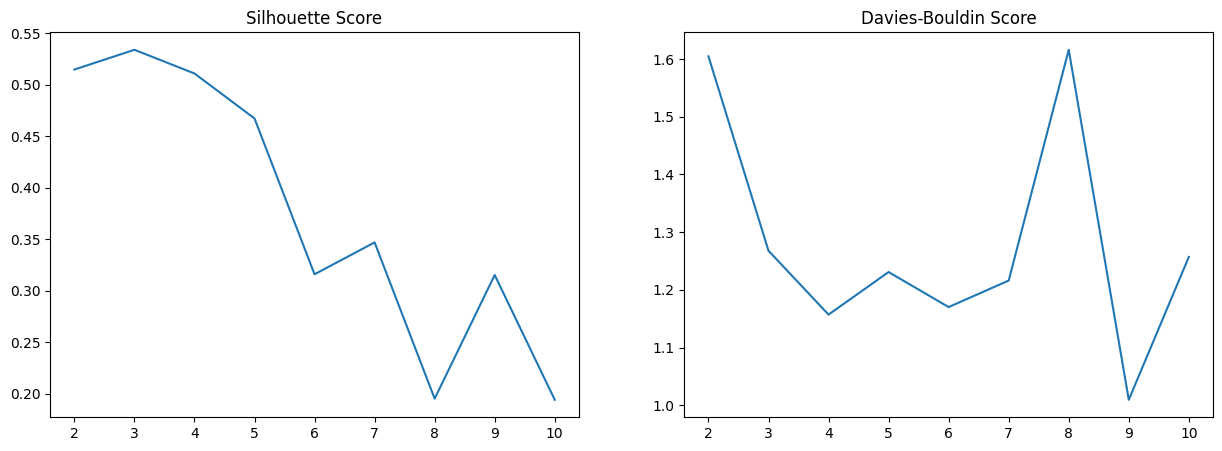

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_gmm(data, min_clusters=2, max_clusters=10):
    gmm_scores = {
        'Silhouette': [],
        'Davies-Bouldin': [],
    }

    for k in range(min_clusters, max_clusters + 1):
        gmm = GaussianMixture(n_components=k)
        labels = gmm.fit_predict(data)

        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)

        gmm_scores['Silhouette'].append(silhouette)
        gmm_scores['Davies-Bouldin'].append(db_score)

    return gmm_scores

gmm_scores_original = evaluate_gmm(data_filled.drop(columns=['Category']))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), gmm_scores_original['Silhouette'], label='Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), gmm_scores_original['Davies-Bouldin'], label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.show()


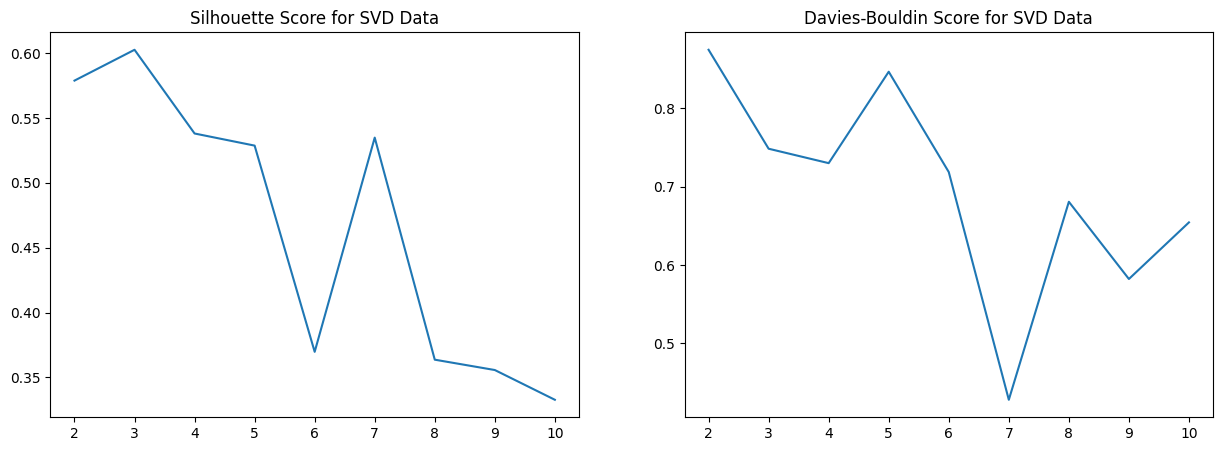

In [ ]:
gmm_scores_svd = evaluate_gmm(svd_df)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), gmm_scores_svd['Silhouette'], label='Silhouette Score')
plt.title('Silhouette Score for SVD Data')

# Коэффициент Davies-Bouldin
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), gmm_scores_svd['Davies-Bouldin'], label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for SVD Data')

plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

gmm_original = GaussianMixture(n_components=5)
labels_original = gmm_original.fit_predict(data_filled.drop(columns=['Category']))

gmm_svd = GaussianMixture(n_components=5)
labels_svd = gmm_svd.fit_predict(svd_df)

rand_index = adjusted_rand_score(labels_original, labels_svd)
print(f"Adjusted Rand Index: {rand_index}")


Adjusted Rand Index: 0.6551660163080737


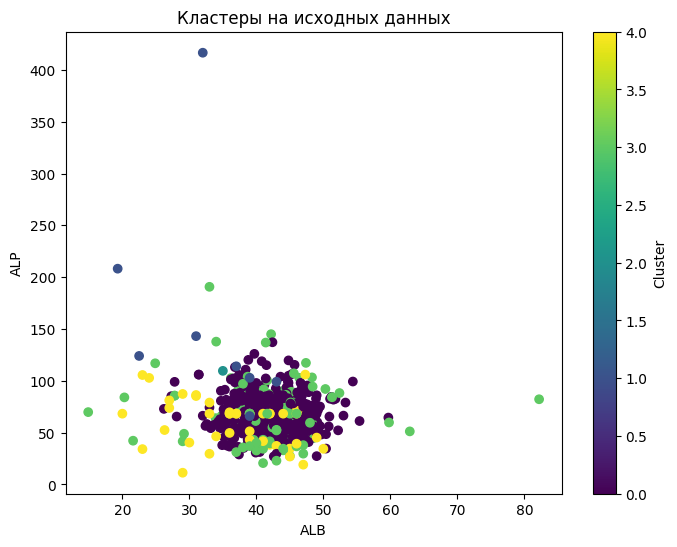

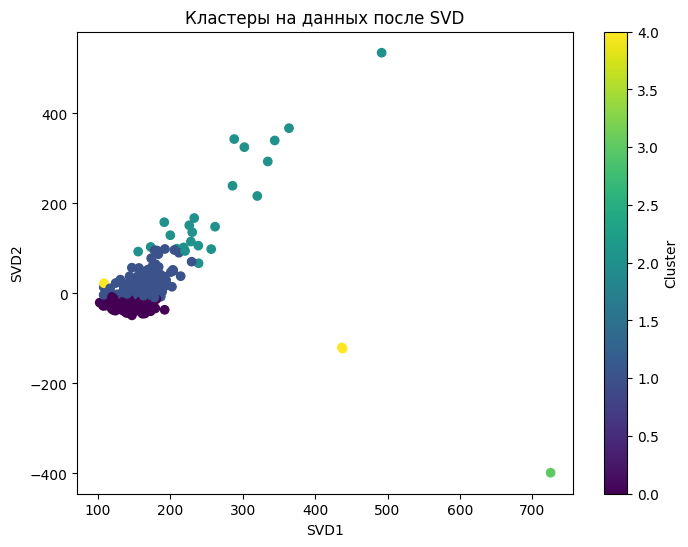

In [ ]:
# Для исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(data_filled['ALB'], data_filled['ALP'], c=labels_original, cmap='viridis')
plt.title('Кластеры на исходных данных')
plt.xlabel('ALB')
plt.ylabel('ALP')
plt.colorbar(label='Cluster')
plt.show()

# Для данных после SVD
plt.figure(figsize=(8, 6))
plt.scatter(svd_df['SVD1'], svd_df['SVD2'], c=labels_svd, cmap='viridis')
plt.title('Кластеры на данных после SVD')
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.colorbar(label='Cluster')
plt.show()

# Выводы

1) Оптимальное число кластеров = 7. Silhouette Score там наибольшее, Davies-Bouldin - наименьшее

2) Индекс Ранда = 0.65 — это довольно хороший результат, особенно если учесть, что значения около 0 могут означать, что кластеризации плохо совпадают, а значения близкие к 1 указывают на полное совпадение. Индекс 0.65 говорит о том, что несмотря на некоторую потерю информации после SVD, структура данных все еще сохранена.